<a href="https://colab.research.google.com/github/monakeshvari/handwritten-digit-recognition/blob/main/digitrecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary

## Project Summary: Digit Recognition from Images

### Overview

The project demonstrated the process of recognizing handwritten digits using machine learning techniques. After exploring and preprocessing the data, multiple classifiers were trained and evaluated. Hyperparameter tuning was performed to optimize each classifier, and their performances were compared using cross-validation. The best-performing classifier was identified based on accuracy.



### Code Execution Environment:
This code is designed to run in a Google Colab environment. Ensure you have the required libraries installed or install them using `!pip install library_name`.




### Libraries Used:
- `sklearn`: For dataset, preprocessing, model selection, and evaluation.
- `matplotlib`: For data visualization.
- `pandas`: For data manipulation.




### Steps:

#### 1. Data Exploration
- Loaded the dataset using `load_digits()` from `sklearn.datasets`.
- Explored dataset information with `DESCR`, and checked the shapes of `data`, `target`, and `images`.
- Visualized a sample image and its corresponding label using `matplotlib`.

#### 2. Data Preprocessing
##### Splitting Data
- Split the dataset into training and testing sets using `train_test_split`.

##### Feature Reduction (PCA)
- Reduced the feature dimensions from 64 to 32 using `PCA`.

##### Normalization
- Scaled the features to a range of 0-1 using `MinMaxScaler`.

#### 3. Model Selection
Defined a function `create_estimators()` to create instances of multiple classifiers:
- Decision Tree (`DT`)
- Random Forest (`RF`)
- Support Vector Machine (`SVM`)
- K-Nearest Neighbors (`KNN`)
- Artificial Neural Network (`ANN`)

#### 4. Hyperparameter Tuning
Implemented hyperparameter tuning using `GridSearchCV` for each classifier to find the best parameters.

#### 5. Model Evaluation
Evaluated the classifiers using 5-fold cross-validation and calculated:
- Accuracy
- Precision
- Recall

#### 6. Comparison of Classifiers
Implemented `compare_estimators()` to:
- Tune hyperparameters for each classifier
- Evaluate each classifier
- Compare classifiers based on accuracy

#### 6. Predict testing set
predict testing datas with best model and best parameters
- Train best model with best hyperparameters
- predict testing data
- Calculate accuracy, precision and recall

#### 7. Results
Printed metrics for predicted test data and identified the best-performing model.

# Import Libraries

In [191]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Initialize the dataset

In [192]:
digits = load_digits()

# Analyze data

In [193]:
# describe of dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [194]:
digits.data.shape

(1797, 64)

In [195]:
digits.target.shape

(1797,)

In [196]:
digits.images.shape

(1797, 8, 8)

## Plot data


1.   plot single data
2.   plot multi data



8


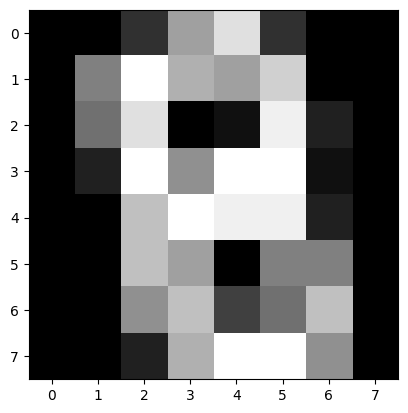

In [197]:
x = digits.images[500]

print(digits.target[500])
plt.gray()
plt.imshow(x)
plt.show()

###

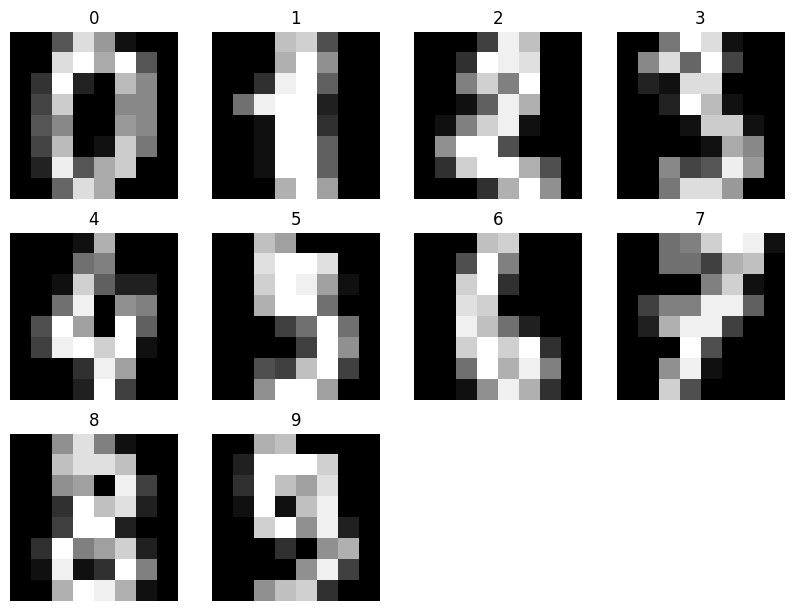

In [198]:
# defining the function plot_multi

def plot_multi(i):
	nplots = 10
	fig = plt.figure(figsize=(10, 10))
	for j in range(nplots):
		plt.subplot(4, 4, j+1)
		plt.imshow(digits.images[i+j])
		plt.title(digits.target[i+j])
		plt.axis('off')
	# printing the each digits in the dataset.
	plt.show()

plot_multi(0)


# Preprocessing

## Split data



*   split data to train and test sets




In [199]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [200]:
print(f"Feature => train : {X_train.shape} - test : {X_test.shape}")
print(f"Label => train : {y_train.shape} - test : {y_test.shape}")

Feature => train : (1347, 64) - test : (450, 64)
Label => train : (1347,) - test : (450,)


## PCA

*   #### Features reduction from 64 dimensions to 32 dimensions

In [201]:
pca = PCA(n_components=32)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [202]:
print(f"PCA RESULT => X_train : {X_train.shape} - X_test : {X_test.shape}")

PCA RESULT => X_train : (1347, 32) - X_test : (450, 32)


## Normalization



*   ### scaling the features in range 0,1



In [203]:
X_train[0]

# before scaling : datas aren't in range(0, 1)

array([ 10.29582468,  10.18098635,  -2.6951708 ,  -2.63353857,
         4.36880789,  -0.42999731, -12.28926368,  -7.36400531,
        -1.38427787,   6.20236205,  -5.3732381 ,  -6.42271482,
        -4.84370175,   4.6653217 ,   0.24048913,  -0.07153821,
         9.0333657 ,  -6.40709457,   4.45257086,  -3.94247671,
        -3.41779983,  -0.32475683,  -0.34790379,   1.807777  ,
        -0.41071402,  -2.31098769,  -3.60670244,   3.55603389,
        -2.43149684,   3.84851887,   2.34396121,   0.56620265])

In [204]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
X_train[0]

# after scaling : datas are in range(0, 1)

array([0.64999806, 0.65391643, 0.42692707, 0.42110648, 0.55428896,
       0.44771482, 0.21832898, 0.28776097, 0.43408897, 0.6649299 ,
       0.22538442, 0.29665186, 0.34729463, 0.63712182, 0.45588638,
       0.40652761, 0.74373535, 0.24986134, 0.62872274, 0.2946531 ,
       0.32758485, 0.41240208, 0.4377542 , 0.55380066, 0.47077382,
       0.34575169, 0.25306964, 0.7217042 , 0.27837951, 0.7619779 ,
       0.64413852, 0.45427695])

# Create Models Function



*   Create a dictionary of classifier models
*   Return : Dictionary of classifiers



In [206]:
def create_estimators():
  estimators = {
      'DT' : DecisionTreeClassifier(),
      'RF' : RandomForestClassifier(),
      'SVM' : SVC(),
      'KNN' : KNeighborsClassifier(),
      'ANN' : MLPClassifier()
  }
  return estimators


In [207]:
estimators = create_estimators()

In [208]:
estimators

{'DT': DecisionTreeClassifier(),
 'RF': RandomForestClassifier(),
 'SVM': SVC(),
 'KNN': KNeighborsClassifier(),
 'ANN': MLPClassifier()}

# Hyperparameters Tuning Function

## Get param grid Function

* Get parameter grid for hyperparameter tuning based on classifier name.
    Args:  
      name: Name of the classifier
    Returns:  
      dict: Parameter grid for hyperparameter tuning

In [209]:
def get_param_grid(name):
    param_grids = {
        'DT': {'max_depth': [None, 32, 64, 128], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']},
        'RF': {'n_estimators': [100, 200, 300, 500], 'max_depth': [None, 16, 32, 64], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4]},
        'SVM': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
        'KNN': {'n_neighbors': [5, 8, 10, 12], 'algorithm': ['kd_tree', 'ball_tree', 'brute'], 'leaf_size': [20, 28, 36]},
        'ANN': {'hidden_layer_sizes': [(128,), (256,), (512,), (256, 128,), (512, 256,)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'learning_rate_init': [0.001, 0.01]}
    }

    return param_grids.get(name, {})



## Tune hyperparameters Function

* Tune hyperparameters using GridSearchCV

    Args:
            estimators: Classifier instance
            param_grid: Dictionary of hyperparameters to tune
            
    Returns:
            best_estimator: Best estimator after hyperparameter tuning

In [210]:
def tune_hyperparameters(estimators, param_grid, cv=3):

  grid_search = GridSearchCV(estimators, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  best_estimator = grid_search.best_estimator_
  best_params = grid_search.best_params_

  print(f"Best parameters for {estimators.__class__.__name__}: {best_params}")


  return best_estimator


# Evaluate Models

* Evaluate classifier using cross-validation.
        
    Args:
        clf: Estimator instance
        cv: Number of cross-validation folds
        
    Returns:
        dict: Dictionary of evaluation metrics

In [211]:
def evaluate_estimators(estimator, cv=5):
    acc_scores = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='precision_macro')
    recall_scores = cross_val_score(estimator, X_train, y_train, cv=cv, scoring='recall_macro')


    return {
        'Accuracy': acc_scores.mean(),
        'Accuracy std': acc_scores.std(),
        'Precision': precision_scores.mean(),
        'Precision std': precision_scores.std(),
        'Recall': recall_scores.mean(),
        'Recall std': recall_scores.std()
    }

# Compare Estimators

* Compare different classifiers by tuning hyperparameters and evaluating with cross-validation.
        
    Returns:
      dict: Dictionary of evaluation metrics for each classifier

In [212]:

def compare_estimators(estimators, cv=3):
    evaluation_metrics = {}

    for name, estimator in estimators.items():
        print(f"Evaluation results for {estimator.__class__.__name__}:")
        print(f"Tuning hyperparameters for {name}:")
        best_estimator = tune_hyperparameters(estimator, get_param_grid(name), cv=cv)

        metrics = evaluate_estimators(best_estimator, cv=cv)
        evaluation_metrics[name] = metrics
        print(100 *'=')

    return evaluation_metrics

In [213]:
estimators = create_estimators()
evaluation_metrics = compare_estimators(estimators)

# Print evaluation metrics
for name, metrics in evaluation_metrics.items():
        print(f"Evaluation metrics for {name}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
        print(100 *'=')

Evaluation results for DecisionTreeClassifier:
Tuning hyperparameters for DT:
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 64, 'min_samples_leaf': 1, 'min_samples_split': 4}
Evaluation results for RandomForestClassifier:
Tuning hyperparameters for RF:
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for RandomForestClassifier: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Evaluation results for SVC:
Tuning hyperparameters for SVM:
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Evaluation results for KNeighborsClassifier:
Tuning hyperparameters for KNN:
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for KNeighborsClassifier: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 5}
Evaluation results for M

# Plotting evaluation metrics

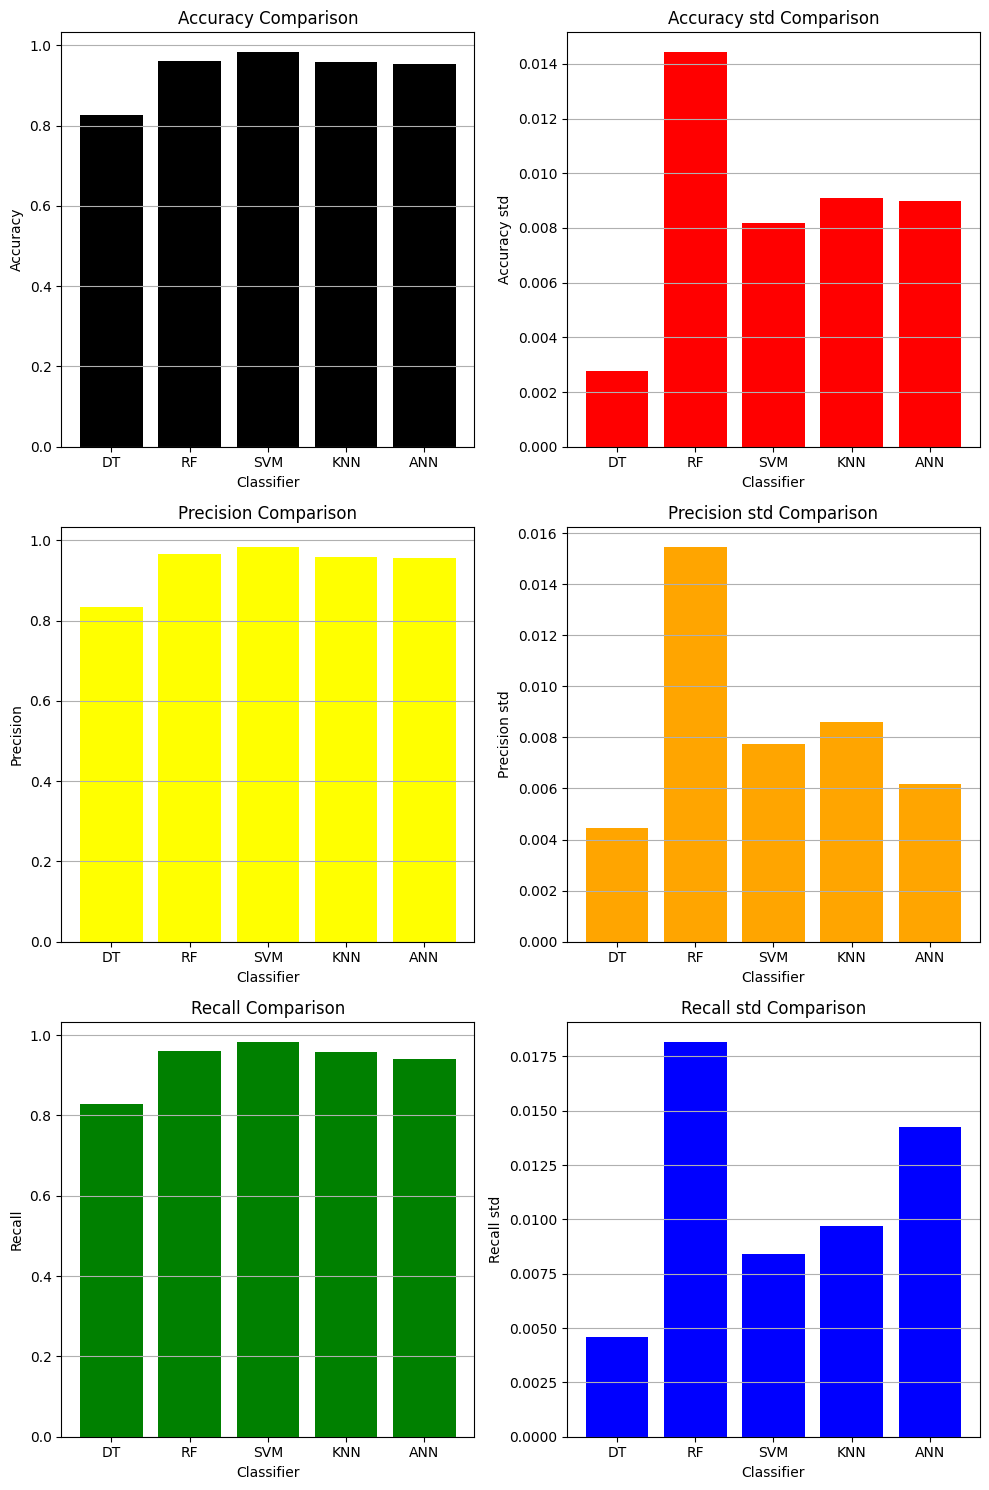

In [219]:

# Plotting evaluation metrics
titles = ['Accuracy', 'Accuracy std', 'Precision', 'Precision std', 'Recall', 'Recall std']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue']

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Flatten the axis array for iteration
axs = axs.flatten()

for i, metric in enumerate(titles):
    values = [metrics[metric] for metrics in evaluation_metrics.values()]

    # Plot each bar chart
    axs[i].bar(evaluation_metrics.keys(), values, color=colors[i])
    axs[i].set_title(f"{metric} Comparison")
    axs[i].set_xlabel("Classifier")
    axs[i].set_ylabel(metric)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()


# Predict test data

* Train svm model
* Predict test data
* evaluate model on test data

In [215]:
# best model = svm
# best parameters = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

svm = SVC(C=10, gamma='scale', kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10)

In [216]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [217]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')

In [218]:
print(f"acc-train:{acc_train:.4f} - acc-test:{acc_test:.4f} - precision:{precision:.4f} - recall:{recall:.4f}")

acc-train:1.0000 - acc-test:0.9867 - precision:0.9869 - recall:0.9867
